# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from collections import deque
from ddpg_agent import Agent
import torch

state_size=env_info.vector_observations[0].shape[0]
action_size=brain.vector_action_space_size

agent1 = Agent(state_size=state_size, action_size=action_size, random_seed=100)
agent2 = Agent(state_size=state_size, action_size=action_size, random_seed=200)

In [6]:
def save_agents(agent1, agent2, filename='checkpoint_collab.pth'):
    torch.save({
        'agent1_actor': agent1.actor_local.state_dict(),
        'agent1_critic': agent1.critic_local.state_dict(),
        'agent1_actor_optimizer': agent1.actor_optimizer.state_dict(),
        'agent1_critic_optimizer': agent1.critic_optimizer.state_dict(),
        'agent2_actor': agent2.actor_local.state_dict(),
        'agent2_critic': agent2.critic_local.state_dict(),
        'agent2_actor_optimizer': agent2.actor_optimizer.state_dict(),
        'agent2_critic_optimizer': agent2.critic_optimizer.state_dict(),
    }, filename)

In [7]:
n_episodes = 5000
max_t = 1000
print_every = 100
target_average_score = 0.5


scores_deque = deque(maxlen=100)
scores_list = []
average_scores = []
noise = False
for i_episode in range(1, n_episodes+1):
    # Suppress noise for the first episodes, thus fill the buffer with more random actions.
    if i_episode>200:
        noise=True
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    agent1.reset()
    agent2.reset()
    scores = np.zeros(num_agents)
    
    for t in range(max_t):
        actions1 = agent1.act(states[0], add_noise=noise)
        actions2 = agent2.act(states[1], add_noise=noise)
        env_info = env.step(np.stack((actions1, actions2)))[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards                         
        dones = env_info.local_done            
        
        # slow down the actions by multiplying them by a coefficient.
        agent1.step(states[0], 0.5 * actions1, rewards[0], next_states[0], dones[0])
        agent1.step(states[1], 0.5 * actions2, rewards[1], next_states[1], dones[1])
        
        agent2.step(states[0], 0.5 * actions1, rewards[0], next_states[0], dones[0])
        agent2.step(states[1], 0.5 * actions2, rewards[1], next_states[1], dones[1])

        scores += max(env_info.rewards)                         
        states = next_states  
        if np.any(dones):
            break

    scores_deque.append(np.mean(scores))
    scores_list.append(scores)      

    # Sigma decay
    sigma_decay = 0.995
    min_sigma = 0.05
    if agent1.noise.sigma > min_sigma:
        agent1.noise.decay_sigma(sigma_decay)

    if agent2.noise.sigma > min_sigma:
        agent2.noise.decay_sigma(sigma_decay)

    average_score = np.mean(scores_deque)
    average_scores.append(average_score)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score), end="")
    if i_episode % print_every == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score))  
    if average_score > target_average_score:        
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, average_score))
        save_agents(agent1, agent2, filename='checkpoint_collab.pth')
        
        target_average_score = average_score
#         break; 

Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.00
Episode 500	Average Score: 0.00
Episode 600	Average Score: 0.02
Episode 700	Average Score: 0.01
Episode 800	Average Score: 0.01
Episode 900	Average Score: 0.00
Episode 1000	Average Score: 0.00
Episode 1100	Average Score: 0.00
Episode 1200	Average Score: 0.00
Episode 1300	Average Score: 0.01
Episode 1400	Average Score: 0.02
Episode 1500	Average Score: 0.01
Episode 1600	Average Score: 0.02
Episode 1700	Average Score: 0.04
Episode 1800	Average Score: 0.02
Episode 1900	Average Score: 0.02
Episode 2000	Average Score: 0.02
Episode 2100	Average Score: 0.05
Episode 2200	Average Score: 0.08
Episode 2300	Average Score: 0.03
Episode 2400	Average Score: 0.19
Episode 2500	Average Score: 0.44
Episode 2600	Average Score: 0.19
Episode 2700	Average Score: 0.38
Episode 2800	Average Score: 0.34
Episode 2900	Average Score: 0.41
Episode 2948	Average Score: 0.50
Environment solved 

Episode 3786	Average Score: 1.72
Environment solved in 3786 episodes!	Average Score: 1.72
Episode 3789	Average Score: 1.76
Environment solved in 3789 episodes!	Average Score: 1.76
Episode 3791	Average Score: 1.80
Environment solved in 3791 episodes!	Average Score: 1.80
Episode 3792	Average Score: 1.82
Environment solved in 3792 episodes!	Average Score: 1.82
Episode 3794	Average Score: 1.84
Environment solved in 3794 episodes!	Average Score: 1.84
Episode 3795	Average Score: 1.88
Environment solved in 3795 episodes!	Average Score: 1.88
Episode 3796	Average Score: 1.91
Environment solved in 3796 episodes!	Average Score: 1.91
Episode 3797	Average Score: 1.93
Environment solved in 3797 episodes!	Average Score: 1.93
Episode 3798	Average Score: 1.93
Environment solved in 3798 episodes!	Average Score: 1.93
Episode 3799	Average Score: 1.97
Environment solved in 3799 episodes!	Average Score: 1.97
Episode 3800	Average Score: 2.00

Environment solved in 3800 episodes!	Average Score: 2.00
Episode 3

KeyboardInterrupt: 

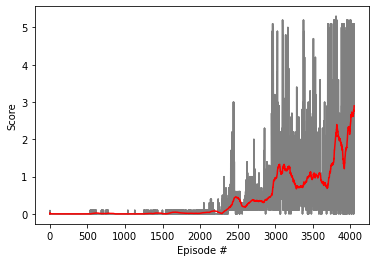

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_list)+1), scores_list, color="grey")
plt.plot(np.arange(1, len(scores_list)+1), average_scores, color="red")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Load saved models

In [9]:
# Load models
checkpoint = torch.load('checkpoint_collab.pth')

agent1.actor_local.load_state_dict(checkpoint['agent1_actor'])
agent1.critic_local.load_state_dict(checkpoint['agent1_critic'])
agent1.actor_optimizer.load_state_dict(checkpoint['agent1_actor_optimizer'])
agent1.critic_optimizer.load_state_dict(checkpoint['agent1_critic_optimizer'])

agent2.actor_local.load_state_dict(checkpoint['agent2_actor'])
agent2.critic_local.load_state_dict(checkpoint['agent2_critic'])
agent2.actor_optimizer.load_state_dict(checkpoint['agent2_actor_optimizer'])
agent2.critic_optimizer.load_state_dict(checkpoint['agent2_critic_optimizer'])

### Test the agents

In [10]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions1 = agent1.act(states[0], add_noise=False)
        actions2 = agent2.act(states[1], add_noise=False)
        env_info = env.step(np.stack((actions1, actions2)))[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 2.3000000342726707
Score (max over agents) from episode 2: 2.2000000327825546
Score (max over agents) from episode 3: 2.3000000342726707
Score (max over agents) from episode 4: 2.2000000327825546
Score (max over agents) from episode 5: 2.500000037252903


When finished, you can close the environment.

In [11]:
env.close()